In [63]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from scipy.io import loadmat,savemat
from os import system

In [65]:
# Weight matrix generation function
# mode = 0  k-1-param1-k-param1-k+1   k-2-param2-k-param2-k+2
# mode = 1  SmallWorld param1 = K param2 = rewire param3 = w
def generate_matrix(mode,N,param1,param2,param3,filename):
    mat = np.zeros((N,N))
    if mode==0:
        for i in range(N):
            for j in range(N):
                if abs(i-j)==1:
                    mat[i][j]=param1
                elif abs(i-j)==2:
                    mat[i][j]=param2
    elif mode==1:
        mat = nx.to_numpy_array(nx.watts_strogatz_graph(N,param1,param2))*param3
        print(N,param1,param2,param3)
    np.savetxt("Weights/{}.txt".format(filename),mat,fmt='%.3f')
    
# Raster Loading and splitting
def load_raster(N,filename):
    raster = np.zeros((N,100000))
    with open("Rasters/{}.txt".format(filename)) as O:
        lc = 0
        for line in O:
            raster[lc,list(map(int,line.strip().split()))]=1
            lc+=1
    return raster

def save_matlab(N,M,infilename,outfilename):
    raster = load_raster(N,infilename)
    savemat("MatlabRasters/{}.mat".format(outfilename),{"binnedSpikes":raster[np.random.choice(range(N),M,replace=False),:]})
    print("Ajustar('MatlabRasters','MaxEntParams','{}.mat');".format(outfilename))


def load_params(N,infilename):
    ising = loadmat("MaxEntParams/{}.mat".format(infilename))
    params = ising["params"] # N , N*(N-1)/2
    #print(params[:,0],len(params[:,0]),N)
    P = np.zeros((N,N)) #FullMatrix for indexing
    P[np.triu_indices(N, 1)] = params[:,0][N:] #UpperTri Matrix
    P = P+np.diag(params[:,0][:N]) #<h,sigma>

25 4 0.2 0.2


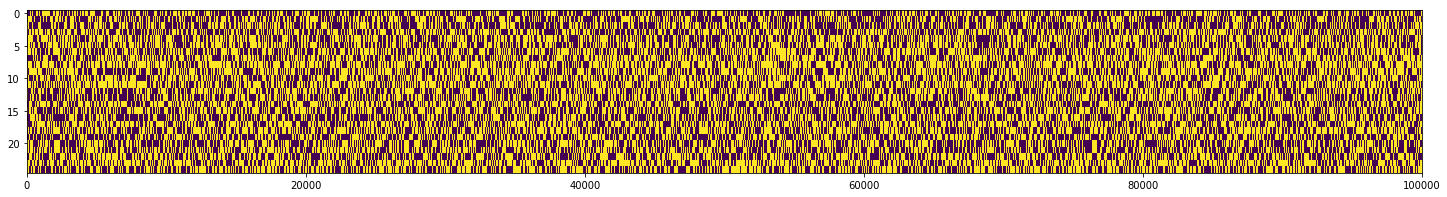

In [64]:
# Testing
generate_matrix(1,25,4,0.2,0.2,"matriz1")
system("./BMS 25 Weights/matriz1.txt Rasters/nuevo2.txt")
ras=load_raster(25,"nuevo2")
plt.figure(figsize=(25,3))
plt.imshow(ras,aspect="auto")
save_matlab(25,20,"nuevo2","nuevo2")